In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeRegressor

In [2]:
# Load the data
data = pd.read_csv('Molecular-data.csv')
data

,Molar volume,Density
0,26.379294,5.254
1,25.847969,5.362
2,26.510484,5.228
3,25.737570,5.385
4,25.402642,5.456
5,24.931968,5.559
6,26.612291,5.208
7,26.694301,5.192
8,26.434639,5.243
9,26.495280,5.231


In [3]:
train_dataset = data.sample(frac=0.8, random_state=0)
test_dataset = data.drop(train_dataset.index)

# Collect input feature for training, molar volume value in this case
train_features = train_dataset.copy() #dataframe type
test_features = test_dataset.copy()

# Collect respective label, density value in this case
train_labels = train_features.pop('Density') # series type
test_labels = test_features.pop('Density')

In [9]:
# Define training model
DecisionTreeModel = DecisionTreeRegressor(max_leaf_nodes=100, random_state=1)

According to [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html), the best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes. Thus, the larger number of leaf nodes, the better the performance.

In [20]:
# Train the model
DecisionTreeModel.fit(train_features, train_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=100,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [21]:
def plot_density(x, y):
  plt.scatter(train_features['Molar volume'], train_labels, label='Data')
  plt.plot(x, y, color='r', label='Predictions')
  plt.xlabel('Molar volume')
  plt.ylabel('Density')
  plt.legend()

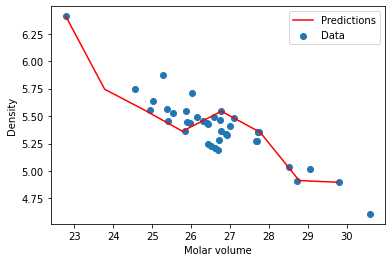

In [22]:
x = np.arange(train_features['Molar volume'].min(), train_features['Molar volume'].max()).reshape(-1, 1)
pred = DecisionTreeModel.predict(x)
plot_density(x,pred)

In [23]:
pred_y = DecisionTreeModel.predict(train_features)
pred_y

array([5.435, 5.638, 5.56 , 5.357, 5.228, 5.337, 4.897, 5.022, 5.456,
       5.456, 5.27 , 5.276, 5.361, 6.409, 5.433, 5.192, 5.524, 5.354,
       5.352, 5.032, 5.744, 5.46 , 5.489, 4.913, 5.479, 5.431, 5.871,
       5.243, 4.609, 5.546, 5.559, 5.278, 5.707, 5.544, 5.362, 5.445,
       5.406, 5.33 , 5.208, 5.488])

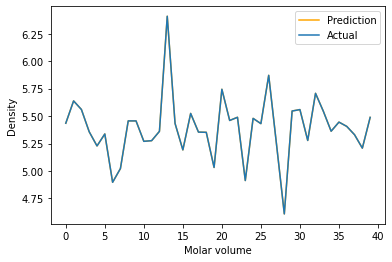

In [24]:
actual_trend=train_labels.values
plt.plot(pred_y, color='orange', label='Prediction')
plt.plot(actual_trend, label='Actual')
plt.xlabel('Molar volume')
plt.ylabel('Density')
plt.legend()
plt.show()

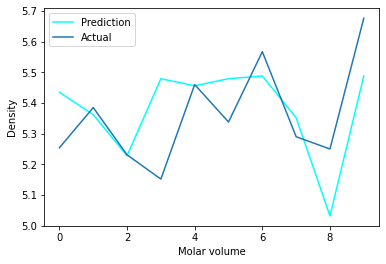

In [25]:
pred_test = DecisionTreeModel.predict(test_features)
actual_test_trend=test_labels.values
plt.plot(pred_test, color='cyan', label='Prediction')
plt.plot(actual_test_trend, label='Actual')
plt.xlabel('Molar volume')
plt.ylabel('Density')
plt.legend()
plt.show()

In [26]:
differences = (1 - sum(abs(pred_test - actual_test_trend))/len(actual_test_trend)) * 100
pred_accuracy = differences.item()
pred_accuracy

87.73999999999998

In [27]:
test_acc = []
axes = []

for i in range(2,101):
  axes.append(i)
  mln_model = DecisionTreeRegressor(max_leaf_nodes=i, random_state=1)
  mln_model.fit(train_features, train_labels)
  mln_pred_y = mln_model.predict(test_features)
  acc = (1 - sum(abs(mln_pred_y - actual_test_trend))/len(actual_test_trend)) * 100
  mln_pred_accuracy = acc.item()
  test_acc.append(mln_pred_accuracy)
  print('Test accuracy for {} maximum number of leaf node is {}'.format(i, mln_pred_accuracy))

Test accuracy for 2 maximum number of leaf node is 81.93314285714277
Test accuracy for 3 maximum number of leaf node is 82.84041176470585
Test accuracy for 4 maximum number of leaf node is 87.29772161172158
Test accuracy for 5 maximum number of leaf node is 86.68028571428567
Test accuracy for 6 maximum number of leaf node is 87.39428571428569
Test accuracy for 7 maximum number of leaf node is 87.39428571428569
Test accuracy for 8 maximum number of leaf node is 87.95555555555559
Test accuracy for 9 maximum number of leaf node is 87.60833333333332
Test accuracy for 10 maximum number of leaf node is 87.37104761904762
Test accuracy for 11 maximum number of leaf node is 88.93628571428572
Test accuracy for 12 maximum number of leaf node is 87.3562857142857
Test accuracy for 13 maximum number of leaf node is 87.3562857142857
Test accuracy for 14 maximum number of leaf node is 86.88628571428569
Test accuracy for 15 maximum number of leaf node is 87.73128571428569
Test accuracy for 16 maximum n

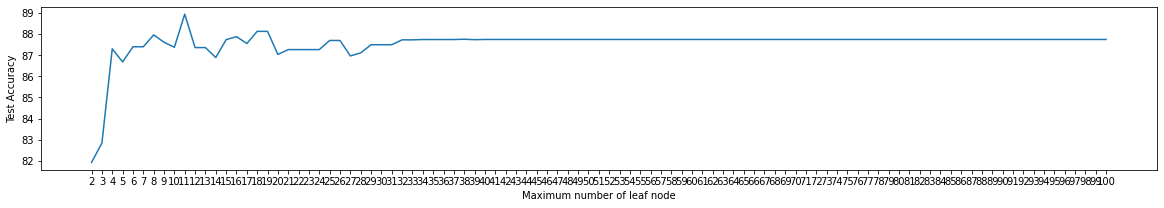

In [28]:
original_axis = list(range(0,len(test_acc)))
plt.figure(figsize=(20, 3))
plt.plot(test_acc)
locs, labels = plt.xticks()
plt.xticks(original_axis,axes)
plt.xlabel('Maximum number of leaf node')
plt.ylabel('Test Accuracy')
plt.show()

Based on testing above, seem like 11 number of maximum leaf node is generate highest test accuracy. Now we can proceed to tune the random state to determine the optimum setting.

In [29]:
rand_test_acc = []
rand_axes = []

for i in range(0,20):
  rand_axes.append(i)
  rand_model = DecisionTreeRegressor(max_leaf_nodes=11, random_state=i)
  rand_model.fit(train_features, train_labels)
  rand_pred_y = rand_model.predict(test_features)
  rand_acc = (1 - sum(abs(rand_pred_y - actual_test_trend))/len(actual_test_trend)) * 100
  rand_pred_accuracy = rand_acc.item()
  rand_test_acc.append(rand_pred_accuracy)
  print('Test accuracy for random state number {} is {}'.format(i, rand_pred_accuracy))

Test accuracy for random state number 0 is 88.93628571428572
Test accuracy for random state number 1 is 88.93628571428572
Test accuracy for random state number 2 is 88.93628571428572
Test accuracy for random state number 3 is 88.93628571428572
Test accuracy for random state number 4 is 88.93628571428572
Test accuracy for random state number 5 is 88.93628571428572
Test accuracy for random state number 6 is 88.93628571428572
Test accuracy for random state number 7 is 88.93628571428572
Test accuracy for random state number 8 is 88.93628571428572
Test accuracy for random state number 9 is 88.93628571428572
Test accuracy for random state number 10 is 88.93628571428572
Test accuracy for random state number 11 is 88.93628571428572
Test accuracy for random state number 12 is 88.93628571428572
Test accuracy for random state number 13 is 88.93628571428572
Test accuracy for random state number 14 is 88.93628571428572
Test accuracy for random state number 15 is 88.93628571428572
Test accuracy for 

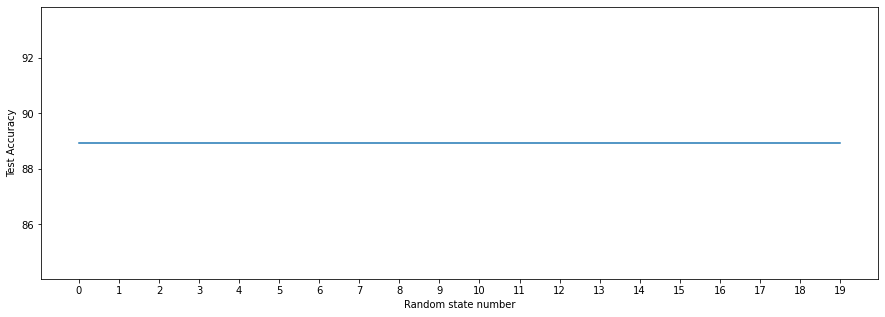

In [30]:
original_axis = list(range(0,len(rand_test_acc)))
plt.figure(figsize=(15, 5))
plt.plot(rand_test_acc)
locs, labels = plt.xticks()
plt.xticks(original_axis,rand_axes)
plt.xlabel('Random state number')
plt.ylabel('Test Accuracy')
plt.show()

The random state number did not affect the prediction accuracy. As conclusion, we will use 11 maximum leaf nodes and random state 1 as optimum parameter setting.

In [31]:
final_model = DecisionTreeRegressor(max_leaf_nodes=11, random_state=1)
final_model.fit(train_features, train_labels)
final_pred_y = final_model.predict(test_features)
final_acc = (1 - sum(abs(final_pred_y - actual_test_trend))/len(actual_test_trend)) * 100
final_pred_accuracy = final_acc.item()

print('Test accuracy :',final_pred_accuracy)

Test accuracy : 88.93628571428572


#**K-Fold Cross-Validation**

In [60]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

score_mean = []
score_std = []

split_num = 7

for i in range(2, split_num):
  # create a KFold object with n splits 
  kf = KFold(n_splits = i, shuffle = True, random_state = 10)
  scores = cross_val_score(final_model, train_features, train_labels, scoring='r2', cv=kf)
  m = np.mean(scores)
  s = np.std(scores)
  score_mean.append(m)
  score_std.append(s)
  print('Number of splits: %d, Accuracy: %.3f, Standard Devidation: %.3f' % (i, m, s))

Number of splits: 2, Accuracy: 0.605, Standard Devidation: 0.050
Number of splits: 3, Accuracy: 0.545, Standard Devidation: 0.115
Number of splits: 4, Accuracy: 0.599, Standard Devidation: 0.124
Number of splits: 5, Accuracy: 0.623, Standard Devidation: 0.215
Number of splits: 6, Accuracy: 0.443, Standard Devidation: 0.400


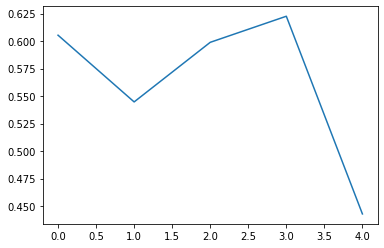

In [63]:
plt.plot(score_mean)